In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pickle
import time
import string
import logging
logging.disable(logging.WARNING)

In [43]:
from sklearn.metrics import auc, roc_curve, confusion_matrix, SCORERS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Benchmark LogisticRegression and DecisionTreeClassifier
## Imports

In [44]:
# IMPORT LIBRARIES
import nltk
from sklearn import cluster, metrics, preprocessing, manifold, decomposition, model_selection
from sklearn import svm
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('words')
#nltk.download('wordnet')
#nltk.download('popular')

In [45]:
## IMPORT DATA
path = '/Users/souha_kassab/OC_P5/static/csv/'
shuffled_data = pd.read_csv(path + 'UniqueTAGS_shfld_data_02-05.csv', index_col=[0], low_memory=False)
shuffled_data


,Title,Body,Tags,Tags_words,AnswerCount,Body_bow,Body_bow_lem,Title_bow,Title_bow_lem,unique_tag
0,"Celery, Django, Redis meet Error 99 when deplo...",I'm trying to deploy my Django project and cel...,<django><docker><redis><docker-compose><celery>,"['django', 'docker', 'redis', 'docker-compose'...",2,trying deploy django project celery docker wan...,trying deploy django project celery docker wan...,celery django redis meet error deploy docker,celery django redis meet error deploy docker,django
1,MVC Model Binding for DateTime is different us...,I encountered following unwanted behaviour whi...,<c#><asp.net-mvc><asp.net-mvc-4><international...,"['c#', 'asp.net-mvc', 'asp.net-mvc-4', 'intern...",1,encountered following unwanted behaviour using...,encountered following unwanted behaviour using...,mvc model binding datetime different using get...,mvc model binding datetime different using get...,c#
2,Is there a nice way to implement a conditional...,For implementing a conditional type I highly e...,<c++><c++11><templates><template-meta-programm...,"['c++', 'c++11', 'templates', 'template-meta-p...",2,for implementing conditional type highly enjoy...,for implementing conditional type highly enjoy...,nice way implement conditional type default fa...,nice way implement conditional type default fa...,c++
3,"Maven compile mixed Java + Groovy 1.7 project,...",As per the top two answers in: maven dependenc...,<java><groovy><maven><compilation><gmaven-plugin>,"['java', 'groovy', 'maven', 'compilation', 'gm...",3,per top two answers maven dependencies groovy ...,per top two answer maven dependency groovy try...,maven compile mixed java groovy 1.7 project us...,maven compile mixed java groovy 1.7 project us...,java
4,efficiently find the first element matching a ...,I have a list of N 64-bit integers whose bits ...,<algorithm><search><optimization><data-structu...,"['algorithm', 'search', 'optimization', 'data-...",4,list bit integers whose bits represent small s...,list bit integer whose bit represent small set...,efficiently find first element matching bit mask,efficiently find first element matching bit mask,algorithm
...,...,...,...,...,...,...,...,...,...,...
49995,How to remove use_frameworks! AND keep using s...,our project is an Objective-c project.Since we...,<ios><swift><cocoapods><react-native-ios><reac...,"['ios', 'swift', 'cocoapods', 'react-native-io...",3,project objective project.since 're using reac...,project objective project.since 're using reac...,how remove use_frameworks and keep using swift...,how remove use_frameworks and keep using swift...,ios
49996,Get physical screen size in Qt,"I'km working in Qt, i need help to get the phy...",<qt><size><screen><monitor><dpi>,"['qt', 'size', 'screen', 'monitor', 'dpi']",2,i'km working need help get physical size scree...,i'km working need help get physical size scree...,get physical screen size,get physical screen size,qt
49997,How do I set the value of a nested formBuilder...,My nested form is currently formatted in this ...,<forms><angular><typescript><angular2-forms><a...,"['forms', 'angular', 'typescript', 'angular2-f...",1,nested form currently formatted way ngoninit t...,nested form currently formatted way ngoninit t...,how set value nested formbuilder group,how set value nested formbuilder group,angular
49998,Keep PostgreSQL from sometimes choosing a bad ...,I have a strange problem with PostgreSQL perfo...,<database><performance><postgresql><sql-execut...,"['database', 'performance', 'postgresql', 'sql...",6,strange problem postgresql performance query u...,strange problem postgresql performance query u...,keep postgresql sometimes choosing bad query plan,keep postgresql sometimes choosing bad query plan,performance


In [46]:
shuffled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          50000 non-null  object
 1   Body           50000 non-null  object
 2   Tags           50000 non-null  object
 3   Tags_words     50000 non-null  object
 4   AnswerCount    50000 non-null  int64 
 5   Body_bow       50000 non-null  object
 6   Body_bow_lem   50000 non-null  object
 7   Title_bow      50000 non-null  object
 8   Title_bow_lem  50000 non-null  object
 9   unique_tag     49999 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.2+ MB


In [47]:
shuffled_data.Tags_words.unique()

array(["['django', 'docker', 'redis', 'docker-compose', 'celery']",
       "['c#', 'asp.net-mvc', 'asp.net-mvc-4', 'internationalization', 'model-binding']",
       "['c++', 'c++11', 'templates', 'template-meta-programming', 'conditional-types']",
       ...,
       "['forms', 'angular', 'typescript', 'angular2-forms', 'angular-reactive-forms']",
       "['database', 'performance', 'postgresql', 'sql-execution-plan', 'postgresql-performance']",
       "['ruby', 'json', 'serialization', 'marshalling', 'yaml']"],
      dtype=object)

In [48]:
import ast
shuffled_data['Tags_words'] = shuffled_data['Tags_words'].apply(lambda x: ast.literal_eval(x))

## Inspect data

In [49]:
small_df = shuffled_data.loc[:1000, :]

In [50]:
small_df.isnull().mean().sort_values()

Title            0.0
Body             0.0
Tags             0.0
Tags_words       0.0
AnswerCount      0.0
Body_bow         0.0
Body_bow_lem     0.0
Title_bow        0.0
Title_bow_lem    0.0
unique_tag       0.0
dtype: float64

In [51]:
means = small_df.select_dtypes(['float64', 'int64']).mean().sort_values()
means

AnswerCount    3.748252
dtype: float64

In [52]:
small_df.isnull().mean()

Title            0.0
Body             0.0
Tags             0.0
Tags_words       0.0
AnswerCount      0.0
Body_bow         0.0
Body_bow_lem     0.0
Title_bow        0.0
Title_bow_lem    0.0
unique_tag       0.0
dtype: float64

## Understand data
### Compute descriptive stats

In [53]:
small_df.describe(include='all') 

,Title,Body,Tags,Tags_words,AnswerCount,Body_bow,Body_bow_lem,Title_bow,Title_bow_lem,unique_tag
count,1001,1001,1001,1001,1001.000000,1001,1001,1001,1001,1001
unique,1001,1001,1001,1001,NaN,1001,1001,1001,1001,123
top,"Celery, Django, Redis meet Error 99 when deplo...",I'm trying to deploy my Django project and cel...,<django><docker><redis><docker-compose><celery>,"[django, docker, redis, docker-compose, celery]",NaN,trying deploy django project celery docker wan...,trying deploy django project celery docker wan...,celery django redis meet error deploy docker,celery django redis meet error deploy docker,c#
freq,1,1,1,1,NaN,1,1,1,1,132
mean,NaN,NaN,NaN,NaN,3.748252,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,3.739326,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


In [54]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1001 non-null   object
 1   Body           1001 non-null   object
 2   Tags           1001 non-null   object
 3   Tags_words     1001 non-null   object
 4   AnswerCount    1001 non-null   int64 
 5   Body_bow       1001 non-null   object
 6   Body_bow_lem   1001 non-null   object
 7   Title_bow      1001 non-null   object
 8   Title_bow_lem  1001 non-null   object
 9   unique_tag     1001 non-null   object
dtypes: int64(1), object(9)
memory usage: 86.0+ KB


### Visualize

In [55]:
def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df[columns].corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show()  

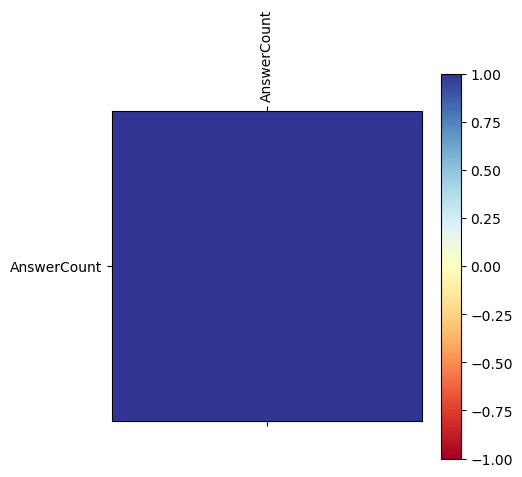

In [56]:
correlationMatrix(small_df)

## Prepare data
### Split data

In [57]:
y = small_df['unique_tag']
y

0            django
1                c#
2               c++
3              java
4         algorithm
           ...     
996      sql-server
997     objective-c
998      javascript
999      javascript
1000            c++
Name: unique_tag, Length: 1001, dtype: object

In [58]:
X = small_df['Body_bow_lem']
X

0       trying deploy django project celery docker wan...
1       encountered following unwanted behaviour using...
2       for implementing conditional type highly enjoy...
3       per top two answer maven dependency groovy try...
4       list bit integer whose bit represent small set...
                              ...                        
996     what longest possible worldwide phone number c...
997     how add date time custom code snippet need fre...
998     currently building markdown editor web markdow...
999     working linkedin web scraping project trying g...
1000    recently used fasu visual compiler option outp...
Name: Body_bow_lem, Length: 1001, dtype: object

In [59]:
# SPLIT INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

In [60]:
y_train

68            ios
481             c
619    javascript
436       android
258        python
          ...    
835          html
192        python
629           php
559        arrays
684           ios
Name: unique_tag, Length: 700, dtype: object

In [61]:
y_test

708              c++
533              c++
298           python
356    ruby-on-rails
833       javascript
           ...      
889             java
474              c++
416              ios
10                 r
105       javascript
Name: unique_tag, Length: 301, dtype: object

### Features engineering using BoW and Tf-Idf

In [62]:
# BAG OF WORDS INSTANCE
bow_vect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
# TF-IDF INSTANCE
tf_vect = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'Body_bow_lem'
#train_x = small_df[feat]
bow_fit = bow_vect.fit(X_train)
tf_fit = tf_vect.fit(X_train)


In [63]:
#bow_fit.get_feature_names_out()
#print(tf_fit.get_feature_names_out())
tf_fit.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.95,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

### Normalize data

In [64]:
bow_transform = bow_fit.transform(X_train)  
tf_transform = tf_fit.transform(X_train) 


In [65]:
tf_transform.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
# display the document-term matrix
vocab = tf_fit.get_feature_names_out()
docterm = pd.DataFrame(tf_transform.todense(), columns=vocab)
print(docterm.info() )
docterm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Columns: 14154 entries, 00 to 中文简体
dtypes: float64(14154)
memory usage: 75.6 MB
None


,00,000,0000,000000,00000000,0000000000,0000000000000000,000000000000000007,0000000000000086,00000000000001,...,zsh,zthis,zygoteinit,zzz,איציק,الأسم,تجريب,تجريبedit,محمد,中文简体
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create and fit different classification models

In [111]:
# LOGISTIC REGRESSION
model_lr = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)
model_lr.fit(docterm, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [112]:
print(model_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [113]:
# DECISION_TREE CLASSIFIER
model_dt = DecisionTreeClassifier()
model_dt.fit(docterm, y_train)

DecisionTreeClassifier()

In [114]:
print(model_dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


## Check the models

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
y_Predict_dt =model_dt.predict(docterm)

In [73]:
print('DecisionTree classifier :', accuracy_score(y_train, y_Predict_dt))

DecisionTree classifier : 1.0


In [115]:
y_Predict_lr = model_lr.predict(docterm)
print('LogisticRegression classifier :', accuracy_score(y_train, y_Predict_lr))

LogisticRegression classifier : 0.36857142857142855


In [75]:
model_lr.predict_proba(docterm)

array([[0.01326839, 0.01034338, 0.00290214, ..., 0.00296604, 0.00146729,
        0.00148902],
       [0.01331992, 0.01007918, 0.00294312, ..., 0.00289715, 0.00146717,
        0.00146189],
       [0.0122387 , 0.00977791, 0.00288062, ..., 0.00282539, 0.00143716,
        0.00142279],
       ...,
       [0.01636618, 0.01113545, 0.0031013 , ..., 0.00328965, 0.00153584,
        0.00154701],
       [0.01351713, 0.01506784, 0.00332147, ..., 0.00326881, 0.00167127,
        0.00166433],
       [0.01039098, 0.00838566, 0.00245462, ..., 0.00245121, 0.00123816,
        0.00122372]])

## Evaluate the models

In [76]:
test_term = pd.DataFrame(tf_fit.transform(X_test).todense(), columns=vocab)
print(test_term.info() )
test_term


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 14154 entries, 00 to 中文简体
dtypes: float64(14154)
memory usage: 32.5 MB
None


,00,000,0000,000000,00000000,0000000000,0000000000000000,000000000000000007,0000000000000086,00000000000001,...,zsh,zthis,zygoteinit,zzz,איציק,الأسم,تجريب,تجريبedit,محمد,中文简体
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.145166,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
y_Predict_dt =model_dt.predict(test_term)
y_Predict_dt

array(['c#', 'c#', 'c#', 'validation', 'sql-server', 'ruby-on-rails',
       'java', 'ios', 'php', 'c#', 'c#', 'python', 'android', 'c#', 'c#',
       'c#', 'c#', 'c++', 'javascript', 'c#', 'algorithm', 'javascript',
       'java', 'php', 'php', 'python', '.net', 'c#', 'exception',
       'entity-framework', 'entity-framework', 'c', 'java', 'c++', 'c++',
       'javascript', 'c#', 'windows', 'java', 'ios', 'validation', 'c#',
       'asp.net-mvc', 'android', 'javascript', 'javascript', 'validation',
       'c#', 'matlab', 'ios', 'c#', 'ios', 'php', 'c#', 'javascript',
       'c++', 'java', 'c#', 'javascript', 'java', 'python', 'javascript',
       'c#', 'c#', 'ios', 'c#', 'java', 'c#', 'javascript', 'ios', 'ios',
       'c#', 'javascript', 'android', 'entity-framework', 'c#',
       'javascript', 'sql', 'ruby-on-rails', 'android', 'ios', 'c#', 'c#',
       'python', 'java', 'entity-framework', 'c#', 'c#', 'android',
       'dataframe', 'apache-kafka', 'ios', 'spring', 'entity-framework

In [78]:
print('DecisionTree classifier :', accuracy_score(y_test, y_Predict_dt))

DecisionTree classifier : 0.292358803986711


In [79]:
y_Predict_lr = model_lr.predict(test_term)
print('LogisticRegression classifier :', accuracy_score(y_test, y_Predict_lr))

LogisticRegression classifier : 0.30564784053156147


In [80]:
model_lr.predict_proba(test_term)

array([[0.01511553, 0.01194107, 0.0031312 , ..., 0.00317098, 0.00160997,
        0.00167685],
       [0.01447632, 0.01184543, 0.00322405, ..., 0.00310471, 0.00152457,
        0.00160121],
       [0.01409189, 0.01108547, 0.00302732, ..., 0.002998  , 0.0015281 ,
        0.00152855],
       ...,
       [0.0144094 , 0.01040659, 0.00305098, ..., 0.00316514, 0.00153409,
        0.00151867],
       [0.01403249, 0.01112526, 0.00316814, ..., 0.00317939, 0.00157403,
        0.00155822],
       [0.01402222, 0.01042442, 0.00309715, ..., 0.00302439, 0.00157229,
        0.00159701]])

So far, Logistic Regression seems to perform better than DecisionTree for tags classification

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, multilabel_confusion_matrix

### Confusion Matrix

In [83]:
print(type(model_lr).__name__)    
print("----------------------------------")
print("Confusion matrix:") # GIVEN IN SORTED ORDER
print(multilabel_confusion_matrix(y_test, y_Predict_lr))

LogisticRegression
----------------------------------
Confusion matrix:
[[[294   0]
  [  7   0]]

 [[299   0]
  [  2   0]]

 [[300   0]
  [  1   0]]

 [[288   0]
  [ 12   1]]

 [[298   0]
  [  3   0]]

 [[300   0]
  [  1   0]]

 [[298   0]
  [  3   0]]

 [[300   0]
  [  1   0]]

 [[299   0]
  [  2   0]]

 [[300   0]
  [  1   0]]

 [[299   0]
  [  2   0]]

 [[299   0]
  [  2   0]]

 [[109 163]
  [  5  24]]

 [[268   4]
  [ 16  13]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[299   0]
  [  2   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[298   0]
  [  3   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1   0]]

 [[295   0]
  [  6   0]]

 [[262   8]
  [ 19  12]]

 [[299   0]
  [  2   0]]

 [[243  20]
  [ 19  19]]

 [[259  10]
  [ 19  13]]

 [[299   0]
  [  2   0]]

 [[300   0]
  [  1   0]]

 [[300   0]
  [  1

In [86]:
np.unique(y_Predict_lr[:7])

array(['c#', 'java', 'javascript', 'python'], dtype=object)

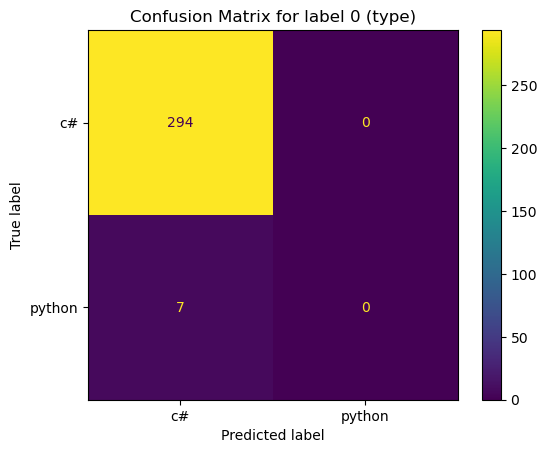

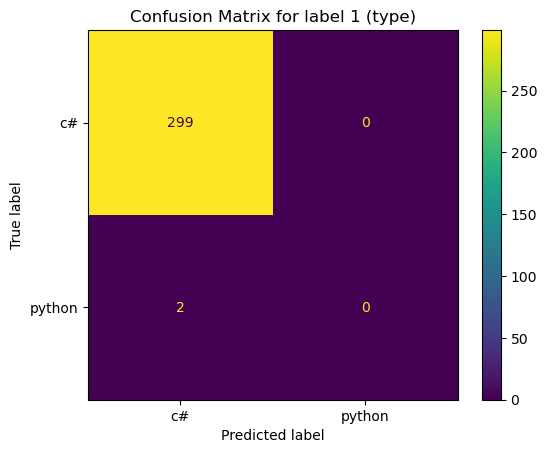

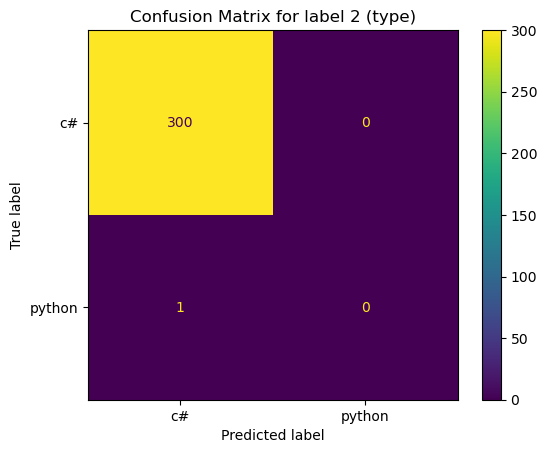

In [87]:
# Plotting matrices: code
MCM = multilabel_confusion_matrix(y_test, y_Predict_lr)
for mcm in range(0, 3):
    cmd = ConfusionMatrixDisplay(MCM[mcm], display_labels=np.unique(y_Predict_lr[:4])).plot()
    plt.title(f'Confusion Matrix for label {mcm} (type)')
    plt.show()
    

### Classification report

In [88]:
print("\nClassification report:")
print(classification_report(y_test, y_Predict_lr))


Classification report:
                     precision    recall  f1-score   support

               .net       0.00      0.00      0.00         7
          algorithm       0.00      0.00      0.00         2
amazon-web-services       0.00      0.00      0.00         1
            android       1.00      0.08      0.14        13
            angular       0.00      0.00      0.00         3
                api       0.00      0.00      0.00         1
            asp.net       0.00      0.00      0.00         3
        asp.net-mvc       0.00      0.00      0.00         1
           assembly       0.00      0.00      0.00         2
     authentication       0.00      0.00      0.00         1
               bash       0.00      0.00      0.00         2
                  c       0.00      0.00      0.00         2
                 c#       0.13      0.83      0.22        29
                c++       0.76      0.45      0.57        29
              cocoa       0.00      0.00      0.00         1

/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### ROC and AUC

In [89]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_train = label_binarizer.transform(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(301, 102)

In [90]:
#y_train.unique()
label_binarizer.transform(["c#"])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [93]:
label_binarizer.classes_

array(['.net', 'algorithm', 'amazon-web-services', 'android', 'angular',
       'angularjs', 'apache', 'apache-kafka', 'apache-spark', 'arrays',
       'asp.net', 'asp.net-mvc', 'assembly', 'asynchronous',
       'authentication', 'c', 'c#', 'c++', 'charts', 'class',
       'cocoa-touch', 'compiler-construction', 'compression', 'cordova',
       'css', 'curl', 'database', 'dataframe', 'datetime', 'django',
       'docker', 'eclipse', 'entity-framework', 'exception', 'ffmpeg',
       'flutter', 'function', 'gcc', 'grouping', 'hibernate', 'html',
       'ionic-framework', 'ios', 'iphone', 'java', 'javascript', 'jms',
       'jquery', 'jsf', 'linux', 'linux-kernel', 'macos', 'maps',
       'matlab', 'maven', 'model-view-controller', 'multithreading',
       'mysql', 'node.js', 'objective-c', 'optimization', 'oracle', 'pdf',
       'performance', 'persistence', 'php', 'plot', 'python',
       'python-3.x', 'r', 'rabbitmq', 'reactjs', 'regex', 'rest',
       'reverse-engineering', 'ruby', '

In [91]:
# Choose a specific class for showing the ROC curve
class_of_interest = "c#"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

16

In [92]:
y_score = model_lr.predict_proba(test_term)
y_score[:, class_id]

array([0.13228431, 0.13787358, 0.1297141 , 0.10704143, 0.09962204,
       0.11729168, 0.12453011, 0.09366075, 0.11446251, 0.17786861,
       0.15762519, 0.166082  , 0.11950462, 0.12166818, 0.14553842,
       0.13107398, 0.29901945, 0.11185468, 0.14579524, 0.10570462,
       0.13497031, 0.15168054, 0.18397587, 0.1422713 , 0.16372585,
       0.12758881, 0.11066766, 0.16297314, 0.13150216, 0.22474348,
       0.18573402, 0.15731942, 0.11420915, 0.14646836, 0.11226059,
       0.17931247, 0.16061335, 0.25563539, 0.12090897, 0.12931814,
       0.13250469, 0.19606834, 0.11832504, 0.14247299, 0.21853441,
       0.15199492, 0.14889912, 0.18416987, 0.20031858, 0.08363466,
       0.47559275, 0.15300403, 0.14157737, 0.17941707, 0.16277231,
       0.07353098, 0.14560675, 0.18432012, 0.1259775 , 0.28392007,
       0.08304484, 0.13136652, 0.12472985, 0.13560078, 0.08688946,
       0.16297798, 0.30256772, 0.18243904, 0.08876333, 0.12122374,
       0.070119  , 0.43390865, 0.14224113, 0.15101104, 0.22182

In [109]:
# Inspect y_Score for Nans
y_score

array([[0.01511553, 0.01194107, 0.0031312 , ..., 0.00317098, 0.00160997,
        0.00167685],
       [0.01447632, 0.01184543, 0.00322405, ..., 0.00310471, 0.00152457,
        0.00160121],
       [0.01409189, 0.01108547, 0.00302732, ..., 0.002998  , 0.0015281 ,
        0.00152855],
       ...,
       [0.0144094 , 0.01040659, 0.00305098, ..., 0.00316514, 0.00153409,
        0.00151867],
       [0.01403249, 0.01112526, 0.00316814, ..., 0.00317939, 0.00157403,
        0.00155822],
       [0.01402222, 0.01042442, 0.00309715, ..., 0.00302439, 0.00157229,
        0.00159701]])

In [102]:
y_train.unique()

array(['ios', 'c', 'javascript', 'android', 'python', 'objective-c',
       'sql', 'web-services', 'mysql', 'c++', 'c#', 'java', 'swift',
       'ffmpeg', 'eclipse', 'php', 'apache-kafka', 'r', 'algorithm',
       'macos', 'css', 'oracle', 'asynchronous', 'asp.net', 'jquery',
       'model-view-controller', 'ruby-on-rails', 'linux', 'apache-spark',
       'html', 'maven', 'ruby', 'reactjs', 'sql-server', 'node.js',
       'performance', 'spring', 'docker', 'rest', 'apache', 'rabbitmq',
       'iphone', 'arrays', 'validation', 'windows', '.net',
       'amazon-web-services', 'uikit', 'regex', 'database', 'assembly',
       'compiler-construction', 'unit-testing', 'ionic-framework',
       'flutter', 'persistence', 'asp.net-mvc', 'django', 'visual-studio',
       'jsf', 'scala', 'angular', 'entity-framework', 'matlab',
       'function', 'webpack', 'video', 'authentication', 'wpf', 'unix',
       'hibernate', 'reverse-engineering', 'exception', 'charts', 'xml',
       'python-3.x', 'secu

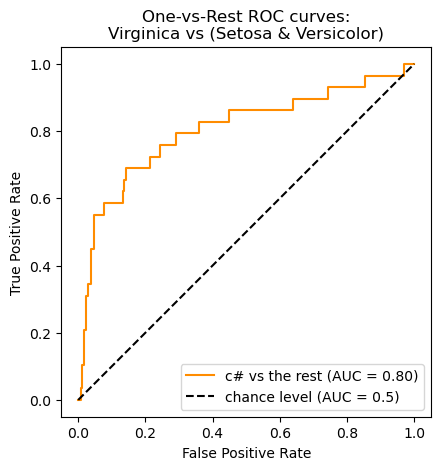

In [94]:
# Multiclass Receiver Operating Characteristic (ROC)

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()



NOT A GREAT ROC CURVE--> SEE HOW TO ADJUST THRESHOLD --> refer to : https://stackoverflow.com/questions/31417487/sklearn-logisticregression-and-changing-the-default-threshold-for-classification

In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferable over macro-averaging. 
Micro-averaging aggregates the contributions from all the classes (using np.ravel) to compute the average metrics as shown in : https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

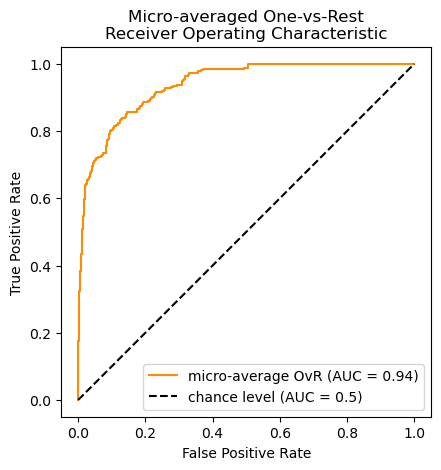

In [96]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()



This is equivalent to computing the ROC curve with roc_curve and then the area under the curve with auc for the raveled true and predicted classes.

In [98]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.94


### PLOT ALL ROC CURVES TOGETHER


/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: Unde

/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: Unde

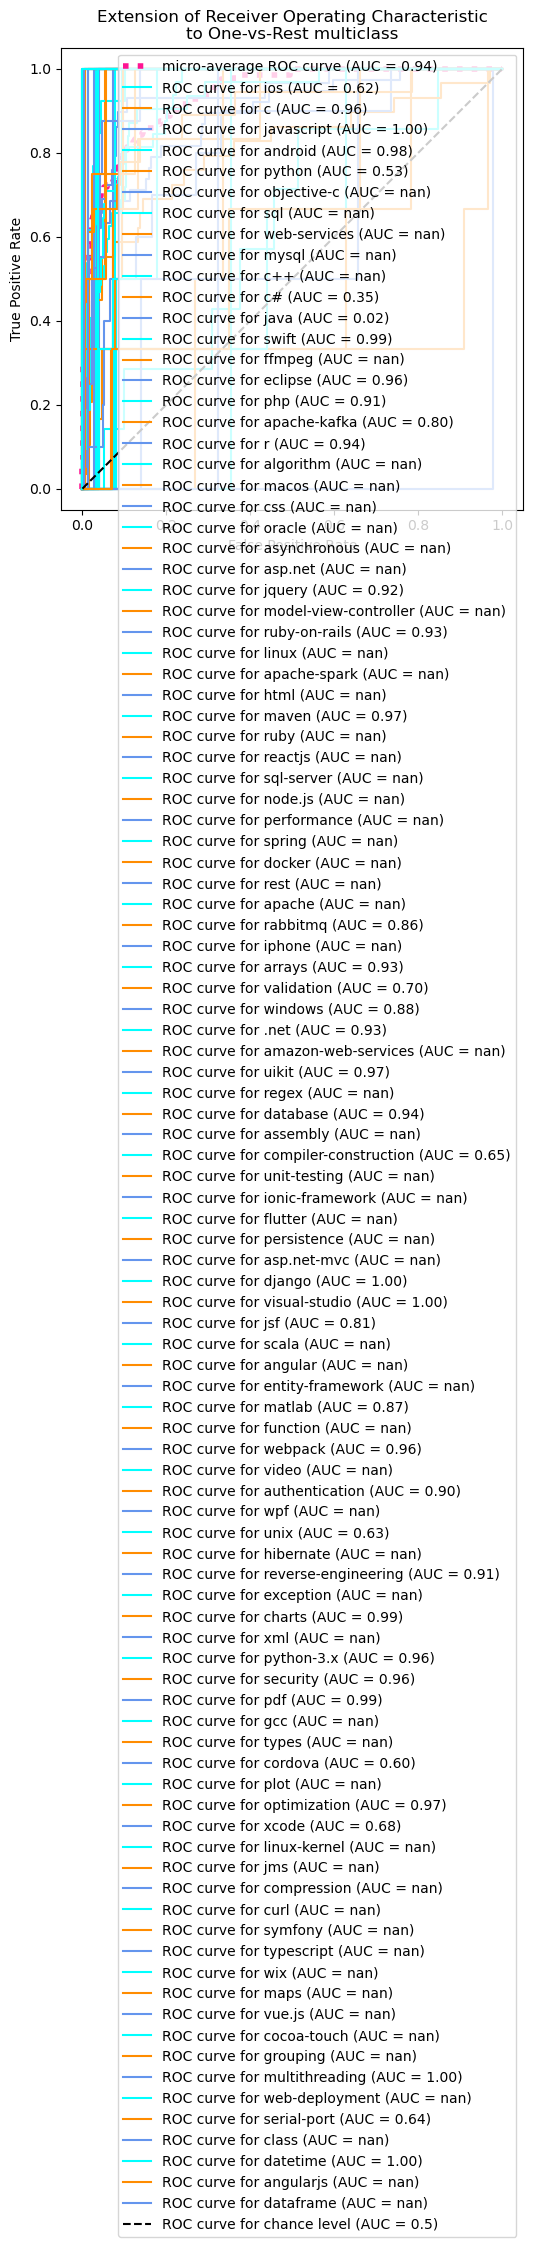

In [103]:
from itertools import cycle
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
n_classes = len(np.unique(y_train))
target_names = y_train.unique()
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [ ]:
  # probs_y is a 2-D array of probability of being labeled as 0 (first  column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_onehot_test[:, class_id], y_score[:, class_id]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.xlim([0.15,0.17])

In [ ]:
# CHANGING THRESHOLDS
fpr, tpr, threshold = roc_curve(y_onehot_test[:, class_id],
    y_score[:, class_id],)
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [ ]:
probs_y=model_lr.predict_proba(test_term)

## Cross-validation

Some algorithms are designed for binary classification problems. Examples include:

    Logistic Regression
    Perceptron
    Support Vector Machines

As such, they cannot be used for multi-class classification tasks, at least not directly.

# Benchmark Support Vector Machine classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
     ('vect', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)),
    ('svc', svm.SVC(C=1.0, kernel='linear', gamma=0.01, probability=True))])
# could test lienar kernel as well

In [ ]:
# SPLIT INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(shuffled_data['Title_bow_lem'], 
                                                    shuffled_data['unique_tag'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
X_train.shape

In [ ]:
# FIT CLASSIFIER
text_clf.fit(X_train,  y_train)

In [ ]:
# PREDICT
y_predict = text_clf.predict(X_test)
np.mean(y_predict == y_test)

In [ ]:
len(y_test)

In [ ]:
# SAve pickle
pickle.dump(text_clf, open("Pipe_trained_svm_ALLdata_230517.p", "wb"))


In [ ]:
cls_pipe = pickle.load(open("Pipe_trained_svm_ALLdata_230517.p", "rb"))

In [ ]:
cls_pipe.predict(X_test)

## Cross-validation

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
skf = StratifiedKFold(n_splits=5)
X=small_df['Body_bow_lem']
y=small_df['unique_tag']
Metrics = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = CountVectorizer(ngram_range=(1,2), max_features=1000 , stop_words="english")
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)

    Metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(Metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))

## Metrics 

In [ ]:
print(type(text_clf).__name__)    
print("----------------------------------")
print("Confusion matrix:") # GIVEN IN SORTED ORDER
print(multilabel_confusion_matrix(y_test, y_predict))

In [ ]:
print("\nClassification report:")
print(classification_report(y_test, cls_pipe.predict(X_test)))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_train = label_binarizer.transform(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

# Benchmark a Dummy classifier
We use X_train and y_train as splitted above for former modeling.
See notebook 'TPs_Classification_and_non-linear_ML' for further information on data prep

## Modeling

In [ ]:
from sklearn.dummy import DummyClassifier

estimator = DummyClassifier()

In [ ]:
estimator.fit(X_train, y_train)

In [ ]:
y_train

## Prediction

In [ ]:
y_pred = estimator.predict(y_test)
y_pred

In [ ]:
# y'a-t-il que des 0 dans ce vecteur?
pd.Series(y_pred).value_counts(normalize=True)
# DUMMY CLASSIFIER HAS THUS RETURNED THE MOST FREQUENT VALUE IN OUR DATAFRAME

In [ ]:
y_test.value_counts(normalize="True")

In [ ]:
te_score = estimator.score(X_test, y_test)
te_score

Finalement, ce score est pratiquement le meme que la frequence de la valeur la plus presente dans ce dataset.
Finalement, le DummyClassifier sert à définir la marge d'amélioration du modèle d'apprentissage utilisé

## Metrics
### Confusion matrix
### roc curve
### F1
### Support

(voir notebook TPs_Classification_and_non-linear_ML)

In [ ]:
# Sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y, probabilities),2)))
    
    # show the plot
    plt.show()


In [ ]:
# ROC / AUC
plotRocAuc(model_lr, docterm, y_train)

In [ ]:
# Evaluate the model
print(type(model_lr).__name__)    
print("----------------------------------")
print("Confusion matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))

print("\nClassification report:")
print(classification_report(y_test, predictions, target_names=data.target_names))

print("\nROC / AUC:")
plotRocAuc(model, X_test, y_test)


In [ ]:
tf_vect.get_feature_names_out()

In [ ]:
print("\nClassification report:")
print(classification_report(y_test, predictions))


In [ ]:
y_test.shape

# Tags prediction from highest probas


## DATA SCIENCE PACKAGES

In [1]:
# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import pickle
import time
import string
import logging
logging.disable(logging.WARNING)

In [2]:
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<(?s:.)*?>') 

## TEXT PROCESSING PACKAGES

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 'run', 'install', 'use', 'using', 'find'])

In [3]:
#from nltk.corpus import stopwords
stop_w = list(set(stop_words)) + ['[', ']', ',', '.', ':', '?', '(', ')', '\\\\b']

## sklearn modeling packages

In [4]:
from sklearn import cluster, metrics, preprocessing, manifold, decomposition, model_selection
from sklearn import svm
from sklearn import base
from sklearn.svm import SVC #Linear SVC would have been the simpler linear version
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import auc, roc_curve, confusion_matrix, SCORERS, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import RocCurveDisplay

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [7]:
path = '/Users/souha_kassab/OC_P5/static/csv/'

## Prepare Data

In [9]:
vocab = tf_fit.get_feature_names_out()

def densify(tfidf_vector, features):
    docterm = pd.DataFrame(tfidf_vector.todense(), columns=features)
    print(docterm.info() )
    return docterm

## LOAD MODEL AND WORD VECTORIZER SAVED IN PICKLE

In [6]:

lr_classifier = pickle.load(open("Cross_valid_lr.p", "rb"))
tf_fit = vectorizer = pickle.load(open("vectorizer_tfidf_31052023.p", "rb"))


In [10]:
#densify(tfidf_vector=tf_fit.transform(X_test), features=vocab)
test_x = densify(tf_fit.transform(['Can I use react to develop an app on ios?']), features=vocab)
y_trial = lr_classifier.predict_proba(test_x)
#(retrieve_proba(y_trial))

#s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 35581 entries, 00 to 视频
dtypes: float64(35581)
memory usage: 278.1 KB
None


In [ ]:
best_thresh=0.308537
df_yproba=pd.DataFrame(y_proba, columns=label_binarizer.classes_)
    # Get tags from tag_proba>best_threshold
s = pd.Series(((df_yproba.values)>best_thresh)[0])

In [34]:
def retrieve_proba(y_proba):
    df_yproba=pd.DataFrame(y_proba)
                           #, columns=label_binarizer.classes_)
    # Get tags from tag_proba>best_threshold
    s = pd.Series(((df_yproba.values)>best_thresh)[0])
    return list(df_yproba.loc[:, s.values])

In [16]:
df_ytrial = pd.DataFrame(y_trial, columns=['.net', 'android', 'asp.net', 'c', 'c#', 'c++', 'git', 'html', 'ios', 'iphone', 'java', 'javascript', 'jquery', 'linux', 'node.js', 'objective-c', 'php', 'python', 'r', 'ruby-on-rails', 'sql', 'windows'])
df_ytrial

,.net,android,asp.net,c,c#,c++,git,html,ios,iphone,...,jquery,linux,node.js,objective-c,php,python,r,ruby-on-rails,sql,windows
0,0.006228,0.039482,0.001719,0.005809,0.022167,0.007528,0.001584,0.002723,0.076163,0.002513,...,0.002085,0.005621,0.086309,0.006118,0.00629,0.027586,0.003519,0.003985,0.00382,0.001519


In [17]:
np.max(df_ytrial)

0.6719799250252672

In [24]:
print (df_ytrial == np.max(df_ytrial))
#df_ytrial.loc[np.max(df_ytrial)]

    .net  android  asp.net      c     c#    c++    git   html    ios  iphone   
0  False    False    False  False  False  False  False  False  False   False  \

   ...  jquery  linux  node.js  objective-c    php  python      r   
0  ...   False  False    False        False  False   False  False  \

   ruby-on-rails    sql  windows  
0          False  False    False  

[1 rows x 22 columns]


In [51]:
s = pd.Series(df_ytrial[df_ytrial == np.max(df_ytrial)].values[0])
#list(df_ytrial.loc[:, s.values])
s.values>0
list(df_yproba.loc[:, s.values>0])[0]

11

In [40]:
df_yproba=pd.DataFrame(y_trial)
                       #, columns=label_binarizer.classes_)
# Get tags from tag_proba>best_threshold
s = pd.Series(((df_yproba.values)>best_thresh)[0])
((df_yproba.values)>best_thresh)

array([[False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False]])

In [67]:
#1- define condition
print(np.max(df_ytrial))
#2- Filter dataframe of probabilities
(df_ytrial[df_ytrial == np.max(df_ytrial)])
#3- Get dataframe individual value per column (result is an array)
print(df_ytrial[df_ytrial == np.max(df_ytrial)].values)
#4- Retrieve values in a list
print(df_ytrial[df_ytrial == np.max(df_ytrial)].values[0])
#5- Get column title from initial probabilities dataframe
list(df_yproba.loc[:, df_ytrial[df_ytrial == np.max(df_ytrial)].values[0]>0])[0]

0.6719799250252672
[[       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan 0.67197993
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]]
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.67197993
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]


11

In [70]:
a=list(df_ytrial.columns)

In [73]:
b=list(df_ytrial.values[0])

In [75]:
sorted(zip(b, a), reverse=True)[:5]

[(0.6719799250252672, 'javascript'),
 (0.08630928441927486, 'node.js'),
 (0.07616292664140856, 'ios'),
 (0.03948222373557375, 'android'),
 (0.027585781385405142, 'python')]

In [90]:
def predict_highestX_proba(tags_proba_df): #parameter can also be predict_highestX_proba(tags_predicted_probas):

    #df_yproba=pd.DataFrame(tags_predicted_probas, columns=label_binarizer.classes_)
    b=list(tags_proba_df.values[0])
    a=list(tags_proba_df.columns)
    return sorted(zip(b, a), reverse=True)[:5]

In [91]:
print(predict_highestX_proba(df_ytrial))

[(0.6719799250252672, 'javascript'), (0.08630928441927486, 'node.js'), (0.07616292664140856, 'ios'), (0.03948222373557375, 'android'), (0.027585781385405142, 'python')]


Object `unzip` not found.
